In [40]:
import numpy as np
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import img_to_array
from keras.utils import load_img
import matplotlib.pyplot as plt
from glob import glob

In [9]:
folders=glob(r"./dataset/valid/*")

In [10]:
classes=[]
a=0
for i in folders:
    a=a+1
    print(a,end="")
    classes.append(i[16:])
    print(" . "+i[16:]+"\n")

1 . daisy

2 . dandelion

3 . rose

4 . sunflower

5 . tulip



# IMAGE AGUMENTATION

In [11]:
data_gen_train = ImageDataGenerator(rescale=1/255.)

data_gen_valid = ImageDataGenerator(rescale=1/255.)

train_generator = data_gen_train.flow_from_directory(r"./dataset/train",batch_size=16, class_mode='categorical')

valid_generator = data_gen_valid.flow_from_directory(r"./dataset/valid",batch_size=16, class_mode='categorical')

Found 3124 images belonging to 5 classes.
Found 1193 images belonging to 5 classes.


In [12]:
width=256
height=256
depth=3

# CREATE MODEL

In [13]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(a))
model.add(Activation("softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 85, 85, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        1

# COMPILE THE MODEL

In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# FIT THE MODEL 

In [21]:
history=model.fit(train_generator,validation_data=valid_generator,epochs=10)

Epoch 1/10
196/196 [==============================] - 679s 3s/step - loss: 1.8666 - accuracy: 0.4430 - val_loss: 3.5072 - val_accuracy: 0.2230
Epoch 2/10
196/196 [==============================] - 662s 3s/step - loss: 1.3491 - accuracy: 0.5528 - val_loss: 2.2328 - val_accuracy: 0.3001
Epoch 3/10
196/196 [==============================] - 709s 4s/step - loss: 1.1904 - accuracy: 0.5794 - val_loss: 1.6025 - val_accuracy: 0.4661
Epoch 4/10
196/196 [==============================] - 674s 3s/step - loss: 0.9700 - accuracy: 0.6501 - val_loss: 1.5926 - val_accuracy: 0.4300
Epoch 5/10
196/196 [==============================] - 793s 4s/step - loss: 0.9373 - accuracy: 0.6620 - val_loss: 1.4219 - val_accuracy: 0.5239
Epoch 6/10
196/196 [==============================] - 819s 4s/step - loss: 0.8427 - accuracy: 0.6978 - val_loss: 1.5072 - val_accuracy: 0.5222
Epoch 7/10
196/196 [==============================] - 779s 4s/step - loss: 0.6677 - accuracy: 0.7538 - val_loss: 1.4285 - val_accuracy: 0.5717

In [17]:
ref=dict(zip(list(train_generator.class_indices.values()),list(train_generator.class_indices.keys())))
print(ref)

{0: 'daisy', 1: 'dandelion', 2: 'rose', 3: 'sunflower', 4: 'tulip'}


# SAVE THE MODEL

In [25]:
model.save("ldd_model.h5")
print("Model Saved Successfully.")

Model Saved Successfully.


In [18]:
from tensorflow import keras
loaded=keras.models.load_model("ldd_model.h5")
print("Loaded")

Loaded


In [63]:
acc=keras.models.load_model("ldd_model.h5").evaluate(valid_generator)[1]
print(f"The accuracy of the LDD model is ={acc*100}%")

75/75 [==============================] - 56s 739ms/step - loss: 1.4634 - accuracy: 0.5926
The accuracy of the LDD model is =59.262365102767944%


In [60]:
prob=[]
import pandas as pd
def predictionn(path):
    a=load_img(path,target_size=(256,256,3))
    a=img_to_array(a)
    plt.imshow(a/225)
    plt.show()
    img = np.array(a) / 225.0
    #img=image.load_img(path,target_size=(256,256,3))
    #i=image.img_to_array(img)
    i=np.expand_dims(img,axis=0)
    p=loaded.predict(i)

    pred=np.argmax(p)
    for i in p:
        for j in i:
            prob.append(j)
    s=["daisy","dandelion","rose","sunflower","tulip"]
    ds=pd.DataFrame(prob,s)
    ds.columns=["Values"]
    print(ds)
    
    prob.sort(reverse=True)
    print(f"\n{ref[pred]} : {prob[0]}")


# TEST THE MODEL

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


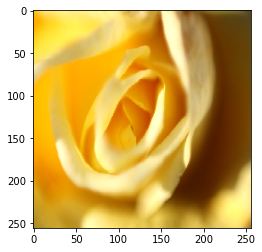

1/1 [==============================] - 0s 145ms/step
             Values
daisy      0.132522
dandelion  0.001017
rose       0.817303
sunflower  0.001003
tulip      0.048155

rose : 0.8173034191131592


In [58]:
path=r"C:\Users\admin\Desktop\7 Semester\IBM_Project\Assessments\dataset\predict_1.jpg"
predictionn(path)

## RESULT: Image predicted as "Rose"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


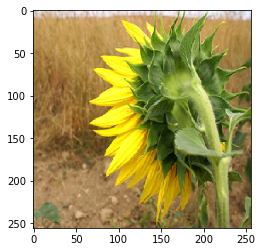

1/1 [==============================] - 0s 94ms/step
             Values
daisy      0.000348
dandelion  0.003005
rose       0.001791
sunflower  0.994557
tulip      0.000299

sunflower : 0.99455726146698


In [61]:
path=r"C:\Users\admin\Desktop\7 Semester\IBM_Project\Assessments\dataset\predict_2.jpg"
predictionn(path)

## RESULT: Image predicted as "Sunflower"